In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('../../../Data/2008.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [3]:
len(df[df['ArrDelay']>30])

901398

In [4]:
df = df[df.Cancelled != 1]
df = df.drop(['Origin', 'Year', 'Dest', 'UniqueCarrier','TailNum', 'CancellationCode', 'Cancelled', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime'], 1)


In [25]:
df['Delay'] = (df['ArrDelay']>30).astype(int)
df = df.fillna(0)

dfnoout = df[np.abs(df.ArrDelay-df.ArrDelay.mean()) <= (3*df.ArrDelay.std())]
dfnoout = dfnoout[np.abs(dfnoout.DepDelay-dfnoout.DepDelay.mean()) <= (3*dfnoout.DepDelay.std())]

In [6]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,1,3,4,2003.0,1955,2225,335,116.0,-14.0,8.0,810,4.0,8.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,3,4,754.0,735,1000,3231,113.0,2.0,19.0,810,5.0,10.0,0,0.0,0.0,0.0,0.0,0.0,0
2,1,3,4,628.0,620,750,448,76.0,14.0,8.0,515,3.0,17.0,0,0.0,0.0,0.0,0.0,0.0,0
3,1,3,4,926.0,930,1100,1746,78.0,-6.0,-4.0,515,3.0,7.0,0,0.0,0.0,0.0,0.0,0.0,0
4,1,3,4,1829.0,1755,1925,3920,77.0,34.0,34.0,515,3.0,10.0,0,2.0,0.0,0.0,0.0,32.0,1


In [20]:
dfnoout.ArrDelay.describe()

count    6.726305e+06
mean     4.175891e+00
std      2.462024e+01
min     -9.200000e+01
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.000000e+01
max      1.230000e+02
Name: ArrDelay, dtype: float64

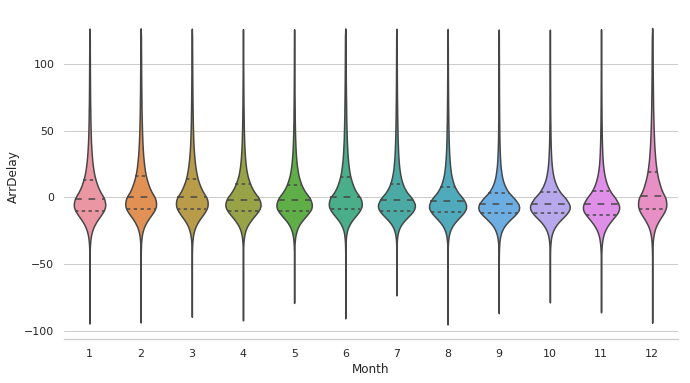

In [16]:


f, ax = plt.subplots(figsize=(11, 6))


sns.violinplot(x="Month", y="ArrDelay",
               split=True, inner="quart",
               data=dfnoout)
sns.despine(left=True)



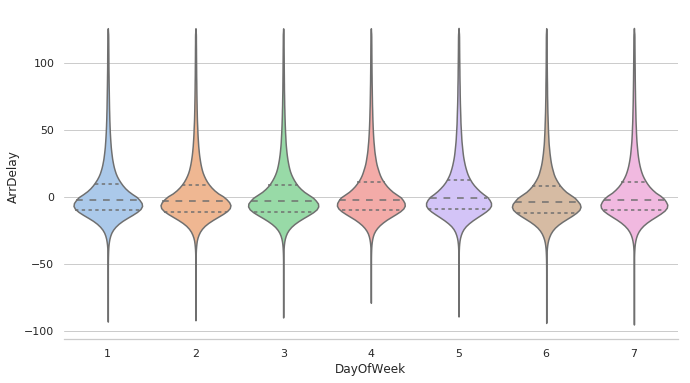

In [17]:
f, ax = plt.subplots(figsize=(11, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="DayOfWeek", y="ArrDelay",
               split=True, inner="quart",
               data=dfnoout)
sns.despine(left=True)

                      Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
Month              1.000000   -0.002296  -0.006700 -0.009071   -0.007713   
DayofMonth        -0.002296    1.000000   0.003874 -0.001941   -0.002062   
DayOfWeek         -0.006700    0.003874   1.000000  0.004732    0.004645   
DepTime           -0.009071   -0.001941   0.004732  1.000000    0.983032   
CRSDepTime        -0.007713   -0.002062   0.004645  0.983032    1.000000   
CRSArrTime         0.000954   -0.002073   0.004838  0.798815    0.790878   
FlightNum          0.005985   -0.000224  -0.001122 -0.007848   -0.011951   
AirTime           -0.012895    0.000828   0.013665 -0.024864   -0.021909   
ArrDelay          -0.057364   -0.001797   0.006406  0.181946    0.129909   
DepDelay          -0.040712    0.000479   0.014131  0.231536    0.171909   
Distance          -0.005848    0.001445   0.016756 -0.016798   -0.012688   
TaxiIn             0.007193   -0.003177   0.009268 -0.052095   -0.051708   
TaxiOut     

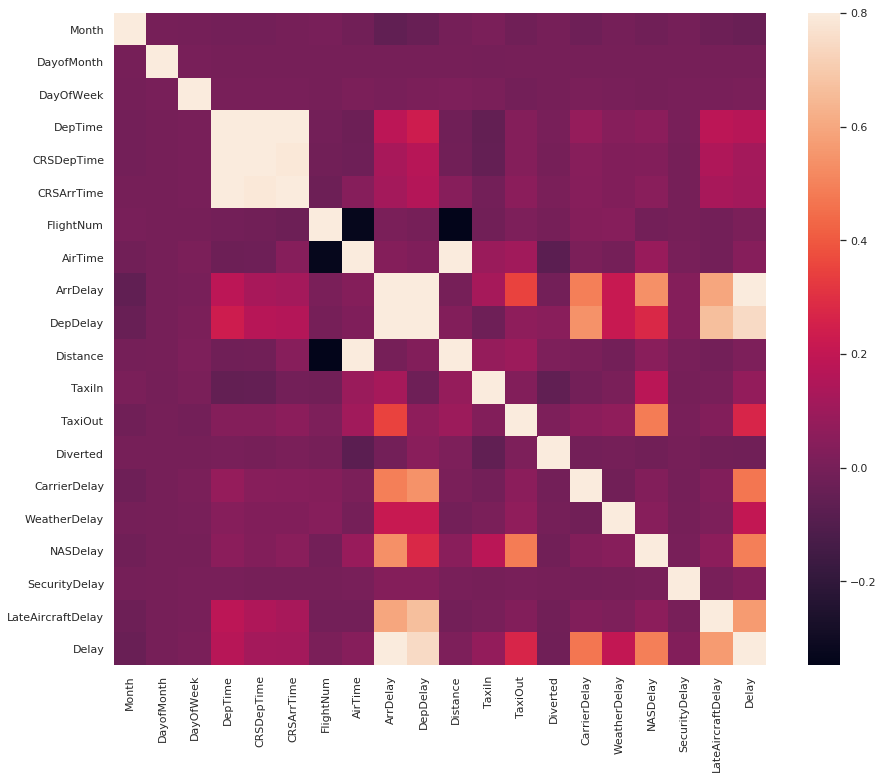

In [22]:
# Make the correlation matrix.
corrmat = dfnoout.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [ ]:
df = df.drop(['Origin', 'Year', 'Dest', 'UniqueCarrier','TailNum', 'CancellationCode', 'Cancelled', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime'], 1)

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


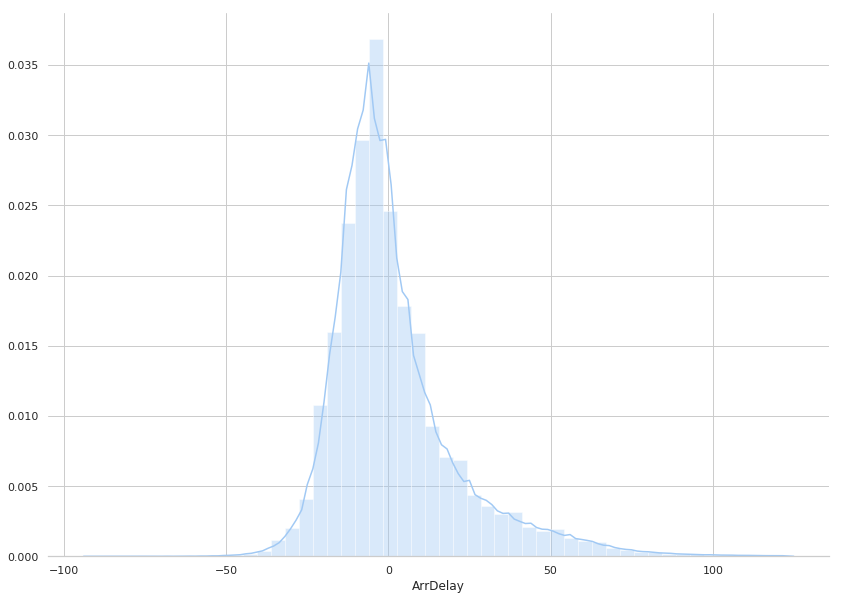

In [61]:
f, axes = plt.subplots(figsize=(14, 10))
sns.distplot(dfnoout.ArrDelay)
sns.despine(left=True)




/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


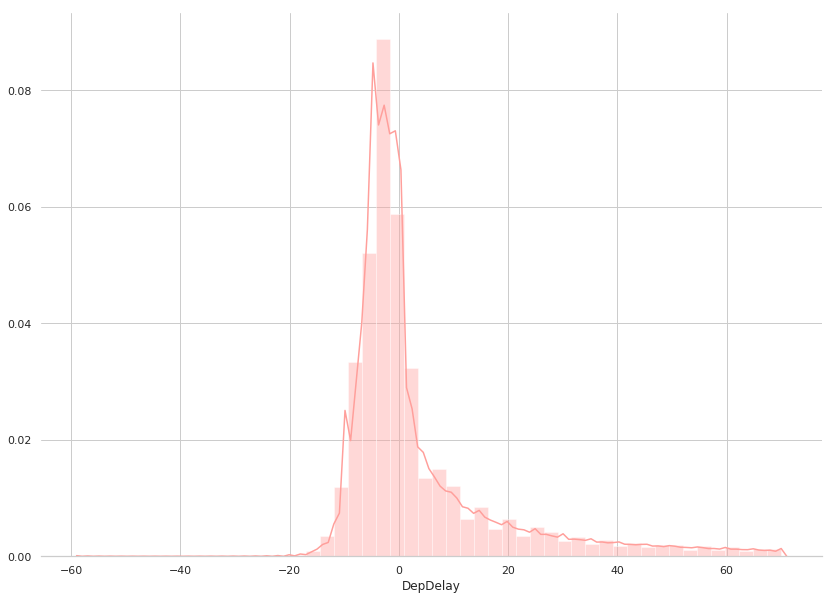

In [65]:
f, axes = plt.subplots(figsize=(14, 10))
sns.distplot(dfnoout.DepDelay, color='r')
sns.despine(left=True)

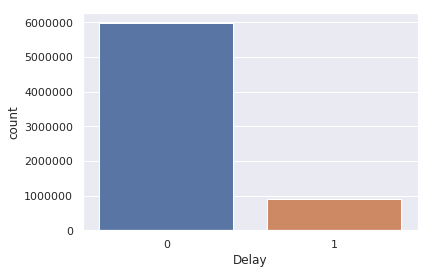

In [66]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Delay", data=df)

In [116]:
df1 = dfnoout.drop('Delay',1)
X = df1.drop('ArrDelay',1)
y = df1['ArrDelay']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [118]:
import sklearn
from sklearn import linear_model
from sklearn import preprocessing

lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train, y_train)
print('\nR² for the model:')
print(lassBig.score(X_train, y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates:')
print(origparams)
print(df1.drop('ArrDelay',1).columns)



R² for the model:
0.8505125813814729

Parameter estimates:
[-7.35755754e-02 -0.00000000e+00 -0.00000000e+00  2.48956865e-04
  3.05091122e-04 -1.26762148e-03 -2.48477425e-04  1.65673045e-01
  6.00590966e-01 -2.19107123e-02  3.83153881e-01  3.62160121e-01
  0.00000000e+00  4.72167516e-01  4.16421670e-01  6.81217528e-01
  0.00000000e+00  4.58361036e-01 -1.15220626e+01]
Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'CRSArrTime', 'FlightNum', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn',
       'TaxiOut', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [119]:
print('Lasso with Test Data:')
print(lassBig.score(X_test, y_test))

Lasso with Test Data:
0.8507296402067159


In [120]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print('\nR² for the model:')
print(ridgeregr.score(X_train, y_train))
origparams = ridgeregr.coef_
print('\nParameter estimates:')
print(origparams)



R² for the model:
0.8428240706514676

Parameter estimates:
[-3.12742532e-01 -7.64203082e-02 -3.84862890e-01  8.11944911e-04
 -1.34485602e-03 -2.74126256e-03 -5.74587642e-04  1.56415527e-01
  5.73093004e-01 -2.18470949e-02  2.82572445e-01  2.84769662e-01
  2.08579971e+01  5.09706615e-01  5.01614633e-01  7.43351977e-01
  5.48795795e-01  4.96261456e-01]


In [121]:
print('Ridge with Test Data:')
print(ridgeregr.score(X_test, y_test))

Ridge with Test Data:
0.8430874412498768
